In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def normalization(feature_value):
  feature_value = np.array(feature_value)
  value = (feature_value-np.mean(feature_value, axis=0))/np.std(feature_value, axis=0)
  return value

def Poly_Reg(X,y,lr,no_iter,data_set):
  X = x_trans(data_set,2)
  X = normalization(X)
  m,n = X.shape
  w = np.zeros((n,1))
  b = 0
  losses = []
  for i in range(no_iter):

    h_x = np.dot(X,w)+b
    loss = cost(h_x,y)
    dw = (1/m)*np.dot(X.T,(h_x-y))
    db = (1/m)*np.sum(h_x-y)
    w -= lr*dw
    b -= lr*db
    losses.append(loss)
    if i%(no_iter/10)==0:
      print('cost after ',i,' iterations is ',loss)
  lst = [i for i in range(no_iter)]
  w = w / (34.374)
  plt.plot(lst,losses,'y')
  plt.show()
  return w,b
def plot(X,y,h_x):
  plt.plot(X, y, 'y.')
  plt.xlabel('X - Input')
  plt.ylabel('y - target / true')
  plt.title('Polynomial Regression')
  plt.show()
def testing(w,b,Xtest):
  ytest = np.dot(Xtest,w)+b
  return ytest
def cost(y_predicted, y_true):
    m=y_predicted.shape[0]
    value=np.sum((y_predicted-y_true)**2)
    return np.sqrt((value)/(2*m))
def x_trans(data_set, max_degree):
  x = np.array(data_set[['X']])
  y = np.array(data_set[['Y']])
  z = np.array(data_set[['Z']])
  data_set_array =np.empty(shape=(x.shape[0], len(deg_val)))
  pos=0
  for pwr in deg_val:
      new_array = (x**(pwr[0]))*(y**(pwr[1]))*(z**(pwr[2]))
      data_set_array[:,pos]=new_array.ravel()
      pos+=1
    
  return data_set_array
case=[]
all_cases =  []
def find_cases(value_sum, numb_features, all_cases=[]):
    if numb_features == 1:
        case.append(value_sum)
        all_cases.append(case.copy())
        case.pop()
        return None
    else:
        for element_value in range(value_sum+1):
            case.append(element_value)
            find_cases(
                value_sum-element_value, numb_features-1, all_cases)
            case.pop()

    return all_cases
def all_powers(max_degree, numb_features):
  deg_val = []
  for degree in range(1, max_degree+1):
      deg_val = find_cases(value_sum=degree, numb_features=numb_features)
  return deg_val
deg_val = all_powers(2,3)



In [ ]:
df = pd.read_csv('Polynomial_train.csv',header = 0)
df


,Unnamed: 0,X,Y,Z,label
0,0,0.643715,-9.866550,-5.836019,307.972927
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590
...,...,...,...,...,...
49995,49995,2.693877,-1.362685,-7.392968,683.405727
49996,49996,-9.270188,-5.456920,-2.343480,-1874.385403
49997,49997,6.616753,-2.847288,-0.504040,663.873655
49998,49998,3.558199,4.507526,-4.823674,-421.004005


In [ ]:
X = np.array([df['X'],df['Y'],df['Z']])
X = X.T
X =normalization(X)


In [ ]:
y = np.array(df['label'])
y = y.reshape(50000,1)
y.shape

(50000, 1)

cost after  0  iterations is  852.6784617973497
cost after  1000  iterations is  8.089132252357546
cost after  2000  iterations is  8.089050035074068
cost after  3000  iterations is  8.089050035073905
cost after  4000  iterations is  8.089050035073905
cost after  5000  iterations is  8.089050035073905
cost after  6000  iterations is  8.089050035073905
cost after  7000  iterations is  8.089050035073905
cost after  8000  iterations is  8.089050035073905
cost after  9000  iterations is  8.089050035073905


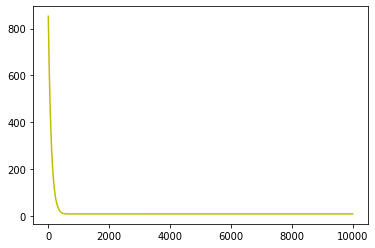

In [ ]:
w,b = Poly_Reg(X,y,0.01,10000,df)


In [ ]:
print(b)

13.257522118599473


In [ ]:
df1 = pd.read_csv('Polynomial_test.csv',header = 0)
df1

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...,...
9995,9995,-0.992449,-7.853677,7.748156,-635.006038
9996,9996,8.574451,6.271919,-5.734962,-1275.855209
9997,9997,6.640997,6.864877,4.511685,-1771.640694
9998,9998,-6.262414,1.323203,-3.917748,-22.746921


In [ ]:
Xtest = np.array([df1['X'],df1['Y'],df1['Z']])
Xtest = Xtest.T
Xtest = (Xtest - X.mean(axis=0))/(np.std(X,axis=0))
Xtest = x_trans(df1,2)
Xtest.shape

(10000, 9)

In [ ]:
ypred = np.dot(Xtest,w)+b
ypred

array([[ -644.16199388],
       [ -513.23583024],
       [  -51.98282507],
       ...,
       [-1691.39812121],
       [  -16.75332002],
       [  -54.51969796]])

In [ ]:
ytest = np.array(df1['label'])